In [4]:
#Prueba de Nominatim para ProyectoCiclsita
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
import requests
# Uso de API's
# -----------------------------------------------------------------------
import requests

# Para incluir una barra de proceso en for loops
# -----------------------------------------------------------------------
from tqdm import tqdm


# Para introducir tiempo entre las llamadas
# -----------------------------------------------------------------------
from time import sleep


# Para trabajar con archivos dotenv y los tokens
# -----------------------------------------------------------------------

import os
import dotenv
dotenv.load_dotenv()

from geopy.geocoders import Nominatim
from tqdm import tqdm
import pandas as pd
from time import sleep





In [5]:
lista_municipios=["Col-du-galibier","Col-du-tourmalet"]

In [6]:
def obtener_df_coordenadas(lista_municipios):
    """
    Obtiene las coordenadas geográficas (latitud y longitud) de una lista de municipios y las devuelve en un DataFrame.

    Parámetros:
    lista_municipios (list): Lista de nombres de municipios.

    Retorna:
    pandas.DataFrame: DataFrame con las columnas 'Municipio', 'Latitud' y 'Longitud'.
    """
    # Inicializar el geolocalizador Nominatim con un user_agent personalizado
    geolocator = Nominatim(user_agent="SetMagic Productions")  # Usamos Nominatim como geolocalizador
    resultados = []  # Lista para almacenar los resultados

    # Iteramos sobre la lista de municipios con una barra de progreso
    for municipio in lista_municipios:
        try:
            # Intentamos obtener la ubicación geográfica del municipio
            location = geolocator.geocode(municipio)
            if location:
                # Si se encuentra la ubicación, añadimos los datos a la lista de resultados
                resultados.append((municipio, location.latitude, location.longitude))
            else:
                # Si no se encuentra la ubicación, añadimos None para latitud y longitud
                resultados.append((municipio, None, None))

            # Pausa de 1 segundo para respetar los términos de uso del servicio y evitar sobrecargas
            sleep(1)

        except Exception as e:
            # Capturamos cualquier error y lo mostramos por pantalla
            print(f"Error al obtener las coordenadas para {municipio}: {e}")
            # Añadimos el municipio con coordenadas None en caso de error
            resultados.append((municipio, None, None))

    # Crear un DataFrame con los resultados obtenidos
    df_resultados = pd.DataFrame(resultados, columns=["Municipio", "Latitud", "Longitud"])

    return df_resultados


In [7]:
df_coordenadas_puertos=obtener_df_coordenadas(lista_municipios)

In [8]:
df_coordenadas_puertos


,Municipio,Latitud,Longitud
0,Col-du-galibier,45.064165,6.407878
1,Col-du-tourmalet,42.908375,0.145268


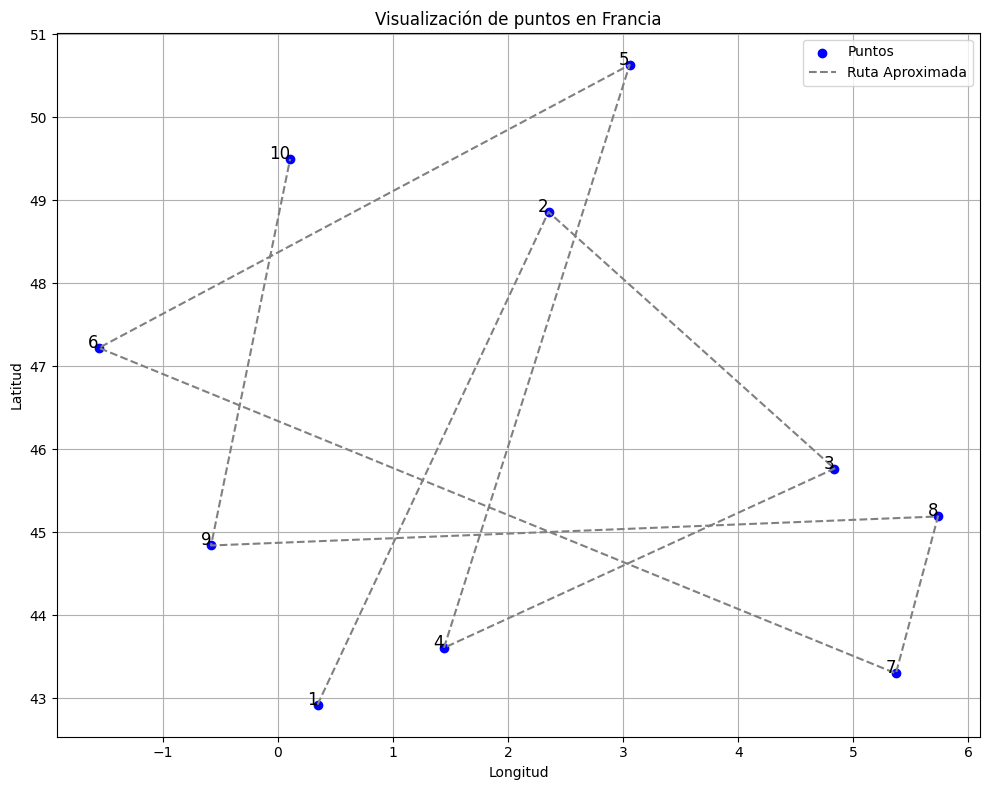

In [9]:
import matplotlib.pyplot as plt

# Definir las coordenadas de los puntos
puntos = [
    (42.9192, 0.3456),  # Col du Tourmalet
    (48.8566, 2.3522),  # París
    (45.7640, 4.8357),  # Lyon
    (43.6045, 1.4442),  # Toulouse
    (50.6292, 3.0573),  # Lille
    (47.2184, -1.5536), # Nantes
    (43.2965, 5.3698),  # Marsella
    (45.1876, 5.7359),  # Grenoble
    (44.8378, -0.5792), # Burdeos
    (49.4944, 0.1079)   # Le Havre
]

# Extraer latitudes y longitudes
latitudes = [p[0] for p in puntos]
longitudes = [p[1] for p in puntos]

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, color='blue', marker='o', label='Puntos')
plt.plot(longitudes, latitudes, linestyle='--', color='gray', label='Ruta Aproximada')

# Anotaciones para cada punto
for i, (lat, lon) in enumerate(puntos):
    plt.text(lon, lat, f'{i+1}', fontsize=12, ha='right')

# Configuración de la gráfica
plt.title('Visualización de puntos en Francia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
